In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("NHIS 2007 data.csv")
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


In [3]:
# Use the first 100 data points as the training data
df_train = df[:100]
df_train = df_train[['height', 'weight']]

In [4]:
df_train.head()

,height,weight
0,74,260
1,70,185
2,61,170
3,68,175
4,66,168


In [5]:
# Given the heights of people, predict their weights

x = df_train['height'].as_matrix()
y = df_train['weight'].as_matrix()

# better visualization
indexes = np.argwhere(x<90)
indexes = indexes.flatten()
x = x[indexes]
y = y[indexes]

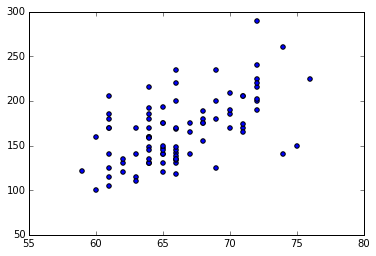

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
lin_reg = LinearRegression()

x = x[:,np.newaxis]
lin_reg.fit(x, y)


/Users/hyunjaecho/Library/Python/2.7/lib/python/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

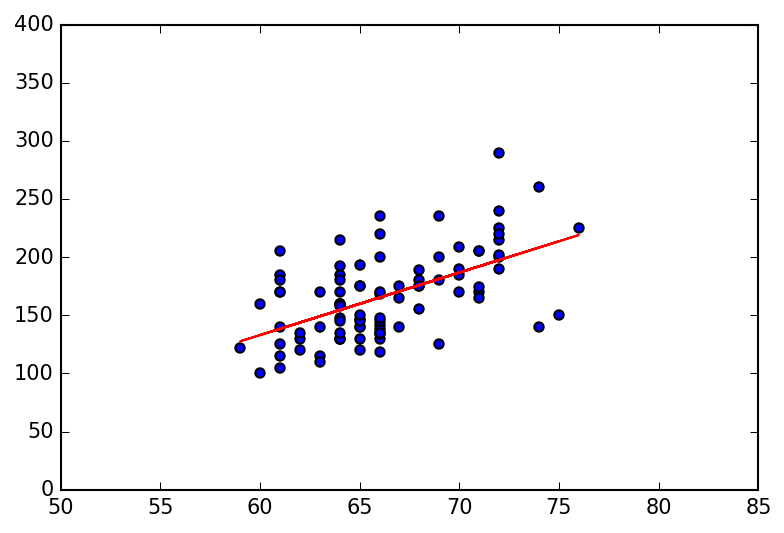

In [8]:
# Plot visualization settings
plt.figure(dpi=150)
plt.xlim(50, 85)
plt.ylim(0, 400)

plt.plot(x, lin_reg.predict(x), color='r')

plt.scatter(x, y)

plt.show()

In [9]:
# Use the second 200 data points as the testing data
test_data = df[100:200]
test_x = test_data['height'].as_matrix()[:,np.newaxis]
test_y = test_data['weight'].as_matrix()

In [10]:
test_x.shape, test_y.shape

((100, 1), (100,))

In [11]:
# Make predictions on testing data
lin_reg_predictions = lin_reg.predict(test_x)

In [12]:
lin_reg_predictions.shape

(100,)

In [13]:
mse = mean_squared_error(test_y, lin_reg_predictions)
mse

27995.075627065115

In [14]:
# How were our predictions for each of 100 person?
np.sqrt(mse/100)
# This number estimates that on average we predicted a preson's weight +- 16.7 lbs. 
# Which is pretty good considering that we only used 100 people as our training data.

16.731729028126505

In [15]:
# What about using all of data

last_100 = len(df)-100

# Training data
x_big = df['height'][:last_100].as_matrix()[:,np.newaxis]
y_big = df['weight'][:last_100].as_matrix()

# Testing data
last_X = df['height'][last_100:].as_matrix()[:,np.newaxis]
last_y = df['weight'][last_100:].as_matrix()

In [16]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_big, y_big)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
more_data_predictions = lin_reg2.predict(last_X)

mse = mean_squared_error(last_y, more_data_predictions)
mse

28489.193108488129

In [18]:
np.sqrt(mse/100) 

16.87874198762696